In [1]:
%config IPCompleter.use_jedi = False
%config Completer.evaluation = 'limited'
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Let's implement polynomial regression just for 1 single input variable

### Steps to do: 
 1. Generate or load input data (just one feature for now)
 2. Add quadratic polynomial features: X --> 1 , X , X^2
 3. Define cost function (Mean Squared Error).
 4. Use Gradient Descent to minimize the cost.
 5. Predict new values 

In [3]:
# Step 1: Generate toy data (y = 3x^2 + 2x + 1 + noise)
np.random.seed(0)

# make a single col X
X = 2 * np.random.rand(100 , 1)
y = 3 * X**2 + 2 * X + 1 + np.random.randn(100, 1) * 0.5

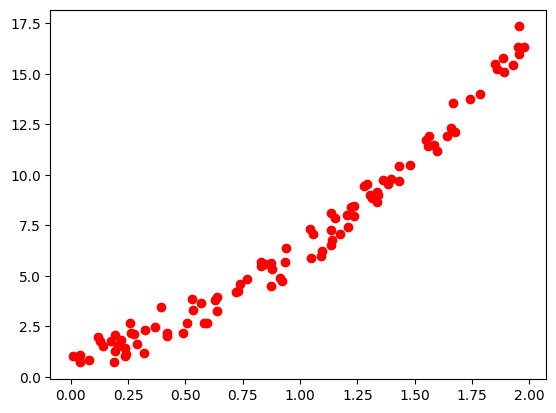

In [4]:
# Let's see the data distributions
plt.scatter(X , y , color = 'r')
plt.show()

## Let's make a ploynomial class for a single input variable

In [5]:
class QuadraticPolynomialRegressionSingleInput:
    ''' 
    Here our main objective is to predict the value of y based a single feature X. 
    We will use a Quadratice equation and then we will use Gradient Descent.

    - workflow:
    1. make a prepare feature method.
    2. make  a fit and a predict method.
    3. for the fit method define a cost function, MSE(Mean Sqaure Error)
    4. use Gradient Descent to minimize the cost function.
    5. then make a predict method
    '''

    # constructor
    def __init__(self , degree = 2 , learning_rate = 0.01 , epochs = 100):
        self.degree = degree
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.coeffs_ = None 
    
    def _transfer(self , X):
        """
        Transforms input vector X into a polynomial feature matrix up to given degree.
        general X = [X^2 , X , 1]
        Example: x = [1, 2] with degree 2 => X_poly = [[1^2, 1, 1], [2^2, 2, 1]]
        """
        X = X.reshape(-1 , 1) 
        X_poly = np.hstack([X**power for power in range(self.degree , -1 , -1)]) # for degree = 2 it will be like [X^2 X^1 X^0]
        return X_poly
    # Make the fit method
    def fit(self , X , y):
        """ 
        Here we will do the gradient descent part.
        1. find the polynomial features of X
        2. initialize coeff_ with any random value. for example: 0
        3. Do the iteration to minimize the error.
        4. At each iteration find target based on current coeff and X_poly
        5. Update coeff
        """
        X_poly = self._transfer(X)
        m , n = X_poly.shape

        self.coeffs_ = np.zeros(n) # for n rows there will be n theta: 1 , theta_1 to theta_n-1

        for epoch in range(self.epochs):
            y_pred = X_poly.dot(self.coeffs_)
            error = y_pred - y 
            # find the gradients.
            gradients = (1/m) * ((X_poly.T).dot(error))
            # update coeff
            self.coeffs_ = self.coeffs_ - self.learning_rate * gradients

    # make the predict function
    def predict(self , X):
        # transform X to X_poly
        X_poly = self._transfer(X)
        # find the y values
        y_pred = X_poly.dot(self.coeffs_)
        return y_pred

### let's predict for out Data 

In [6]:
# Generate some synthetic quadratic data: y = 2x^2 + 3x + 5
np.random.seed(42)
X = np.linspace(-3, 3, 100)
y = 2 * X**2 + 3 * X + 5 + np.random.randn(100) * 2  # Add some noise

In [9]:
model = QuadraticPolynomialRegressionSingleInput(degree = 2 , learning_rate = 0.01 , epochs = 1000)
model.fit(X, y)
y_pred = model.predict(X)

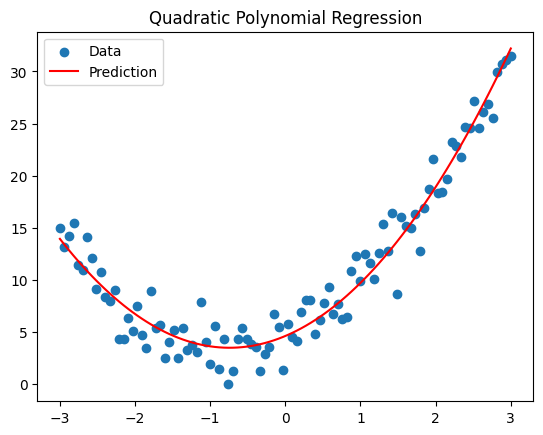

In [10]:
# let's plot the model's prediction
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='red', label='Prediction')
plt.legend()
plt.title("Quadratic Polynomial Regression")
plt.show()

## Let’s now generalize Polynomial Regression to handle multi-column input 𝑋

In [11]:
class PolynomialRegressionMulti:
    def __init__(self, degree=2, learning_rate=0.01, epochs=1000):
        self.degree = degree
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.coeff_ = None

    def _transform(self, X):
        """
        Transforms multi-column X into polynomial features of each column up to given degree.
        For example, if X has 2 columns [x1, x2] and degree=2:
        output: [x1^2, x1^1, x1^0, x2^2, x2^1, x2^0]
        """
        m, n = X.shape
        X_poly = []

        for i in range(n):  # For each feature/column
            col = X[:, i].reshape(-1, 1)
            poly_features = [col**d for d in range(self.degree, -1, -1)]  # x^d, ..., x^1, x^0
            X_poly.append(np.hstack(poly_features))

        return np.hstack(X_poly)  # shape: (m, n * (degree + 1))

    def fit(self, X, y):
        X_poly = self._transform(X)
        m, n = X_poly.shape
        self.coeff_ = np.zeros(n)

        for _ in range(self.epochs):
            y_pred = X_poly.dot(self.coeff_)
            error = y_pred - y
            gradients = (1 / m) * X_poly.T.dot(error)
            self.coeff_ -= self.learning_rate * gradients

    def predict(self, X):
        X_poly = self._transform(X)
        return X_poly.dot(self.coeff_)

In [12]:
# Create 2 features: x1 and x2
np.random.seed(0)
m = 100
x1 = np.linspace(-3, 3, m)
x2 = np.random.uniform(-2, 2, m)
X_multi = np.column_stack((x1, x2))

In [13]:
# True function: y = 2x1^2 + 3x1 + 4x2^2 + 1x2 + 5 + noise
y = 2 * x1**2 + 3 * x1 + 4 * x2**2 + 1 * x2 + 5 + np.random.randn(m) * 2

In [15]:
model = PolynomialRegressionMulti(degree=2, learning_rate=0.01, epochs=1000)
model.fit(X_multi, y)
y_pred = model.predict(X_multi)

In [16]:
from sklearn.metrics import mean_squared_error , r2_score

print("r2 score:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))

r2 score: 0.953720672049342
MSE: 3.7283137241005897
